# Second Assignment: Exercise and a Personal Project

In this second and final assignment you have the opportunity to choose a dataset and perform data analysis to answer the type of questions that interest you or will utilise a technique that you want to gain experience in. 

You may wish to select a dataset that we have already looked at (e.g. Titanic, or IMDB), or select another open-source dataset from Kaggle (or other). Once you've selected a dataset to investigate, proceed to complete the template cells below. In the markdown cells, you should provide a brief introduction to the dataset, and write the questions that you will investigate. Then use the code cells to answer the questions you select.

### Logistics

**Deadline.** Please see the Assessment deadline in specified in Canvas. Late submissions will not be accepted. This notebook is the Second of two Assignments for this course.

**The Assignment Task.** This Second Assignment portfolio will account for the remaining 70 points of the 100 (Assignment 1 was worth 30 marks). This Second Assignment features two parts: 
* Part 1 is out of 20 marks, based on a defined set of problems. This will extend your application of numpy, pandas, and matplotlib on the iris dataset. 
* Part 2 is out of 50 marks, and requires you to perform exploratory data analysis on a dataset of your choice. You should start by selecting a dataset and acquiring the data. Describe the context of the dataset with commentary and descriptive statistics. Then you should choose three questions to ask of the dataset and then outline how to answer them. Where appropriate, seek to display the results with an appropriate plot.

**Submission.** Please email your solutions and your completed Declaration of Authorship (DoA) form to weeklyclasses@conted.ox.ac.uk 

# Part 1 (Set Exercise) (out of 20 marks)

In this first part of Assignment 2, you are asked to continue work on the Iris dataset and further utilise libraries such as NumPy, Pandas and Matplotlib.

### Set up cells

In [1]:
## Installing the python libraries (put this in a separate cell in jupyter notebook)
#pip install numpy 
#pip install pandas 
#pip install matplotlib 
## Let's import the libraries we are going to use later on
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
import seaborn as sns
import math

# Let's set the precision for NumPy and Pandas
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:,.2f}'.format

### Import iris dataset 

In [2]:
# Input:
# Import iris keeping the text column intact
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', 
                     names=['sepal length', 'sepal width', 'petal length', 'petal width', 'species'],
                     dtype=[np.float32, np.float32, np.float32, np.float32, '|S15']
)

### 1A. Produce some descriptive statistics for the iris dataset (5 marks)

For example, display the count of records, mean, std, min, max and in addtion to the quartiles for each of the columns.

*   **Note:** For this question I have shown two ways of producing the summary statistic chart

#### Method one to calculate the summary statistics

I decided to try two ways to display the summary statistics. The first method is a simple one and I just used the `describe()` function to create the summary statistic chart. But I wanted to experiment a bit and see if there was another way to create the summary statistics chart (or even choose which summary statistics I want to show). I show and explain my code for the second method below

In [3]:
#I am converting the iris dataset into a Dataframe and am using the .describe() command to produce the summary statistics
pd.DataFrame(iris).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


#### Method two to calculate the summary statistics

The second method I used to calculate the summary statistics table did not use the `describe()` function. Instead, I decided to create the summary statistics through making a new dataframe. I used the `.agg` (aggregate) function to create the summary statistics. What I liked about this method was that I could choose why type of summary statistics I can include in my table. Exploring this alternative route also taught me that I can create a summary statistic table for a specific formula and have the option to customise the table for my own needs.

In [4]:
class quantiles: 
    def f25(self,x): 
        return x.quantile(0.25) #defining the function for 25th Percentile
    
    def f75(self,x):
        return x.quantile(0.75) #defining the function for 75th Percentile

#I am converting the 'iris' dataset (which are arrays) into a pandas dataframe    
pd.DataFrame(
    #I am specifying the columns that I want to display in my summary statistic table (I did not include 'species' since it is a non-numeric column
    iris[['sepal_length','sepal_width','petal_length','petal_width']] 
            
    #I am now using the '.agg' function for aggregation and am specifying the summary statistics that I want
    #note: any quantile that in not 50 needs to be specified with a function which I have defined above
        ).agg(['count','mean','std','min',quantiles().f25,'quantile',quantiles().f75,'max']
    
    #I am using the '.rename' function to rename the dataframe index (there was a column created for the summary statistic functions that I used but theses names were not in the index but were in a separate column titled 'index')          
                 ).rename(index={0: 'count', 1: 'mean', 2: 'std', 3: 'min', 4: '25%', 5: '50%', 6: '75%',7: 'max'}

    #I am specifying the columns that I want to display in the final version of my dataframe (I am re-specifying the column names because the column 'index' was automatically created when I created the summary statistics
                         )[['sepal_length','sepal_width','petal_length','petal_width']]

### Here is the code in one line without the comments
#pd.DataFrame(iris[['sepal_length','sepal_width','petal_length','petal_width']]
#            ).agg(['count','mean','std','min',quantiles().f25,'quantile',quantiles().f75,'max']
#                 ).rename(index={0: 'count', 1: 'mean', 2: 'std', 3: 'min', 4: '25%', 5: '50%', 6: '75%',7: 'max'})[['sepal_length','sepal_width','petal_length','petal_width']]                 

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
f25,5.10,2.80,1.60,0.30
quantile,5.80,3.00,4.35,1.30
f75,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### 1B. Calculate the maximum petal width for each species of flower (5 marks)

#### Using the for loop to find the max `petal_width` values

My first way of solving this problem was using a for loop to go through each species. I then created a temporary dataframe in the for loop called `species_df` which stored the data for each species. I then used the `species_df` dataframe to filter out the `petal_width` column and calculated the maximum `petal_width` values and rounded the answer by 2 decimal points.


In [5]:
iris_df = pd.DataFrame(iris) #I am converting the iris array into a pandas dataframe

#iris_df['species'].unique() prints out a list of the unique values in the `species` column in the `iris_df` dataframe
for x in iris_df['species'].unique():
    species_df = iris_df.loc[iris_df['species'] == x] #I am creating a new temporary dataframe which filters the dataframe values to each species
    print(x,round(species_df['petal_width'].max(),2) ) #I am filtering the dataset further by outputting the `petal_width` column only. I then calculate the max `petal_width` value for each species

b'Iris-setosa' 0.6
b'Iris-versicolor' 1.8
b'Iris-virginica' 2.5


#### Using the traditional `groupby()` function to calculate the maximum `petal_width`

My second approach to finding the maximum `petal_width` for each species is more traditional and does not require many steps. I would like to highlight that at the end of the code I needed to specify the specific columns that I wanted maximum values from. 

In [6]:
iris_df.groupby('species').max()['petal_width']

species
b'Iris-setosa'       0.60
b'Iris-versicolor'   1.80
b'Iris-virginica'    2.50
Name: petal_width, dtype: float32

### 1C. Data Visualisation (5 marks)

Produce a boxplot for each of the four columns of the iris dataset (sepal_length, sepal_width, petal_length and petal_width) in addition to the volume column (if you completed Assignment 1).

In [7]:
iris_df['volume'] = (math.pi * iris_df['sepal_length']**2 * iris_df['petal_length'])/3
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,volume
0,5.10,3.50,1.40,0.20,b'Iris-setosa',38.13
1,4.90,3.00,1.40,0.20,b'Iris-setosa',35.20
2,4.70,3.20,1.30,0.20,b'Iris-setosa',30.07
3,4.60,3.10,1.50,0.20,b'Iris-setosa',33.24
4,5.00,3.60,1.40,0.20,b'Iris-setosa',36.65
...,...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,b'Iris-virginica',244.45
146,6.30,2.50,5.00,1.90,b'Iris-virginica',207.82
147,6.50,3.00,5.20,2.00,b'Iris-virginica',230.07
148,6.20,3.40,5.40,2.30,b'Iris-virginica',217.37


#### Method one of graphing (viewing all graphs as a grid)

My first method of creating the boxplots is to create all the graphs and display them side by side. I liked using this method since it allowed me to view the data in one go and made it easier to compare the values. One draw back of this method was that I could not display the volume column since it would make the other box plots non-visible (this is because the y-axis range of values in the volume column are much bigger than the other columns so it distorts the y-axis numerical scale). So one important thing to note when using this method is that if you want to display data side-by-side you need to make sure the columns have a similar numerical range so the data can be visible. 

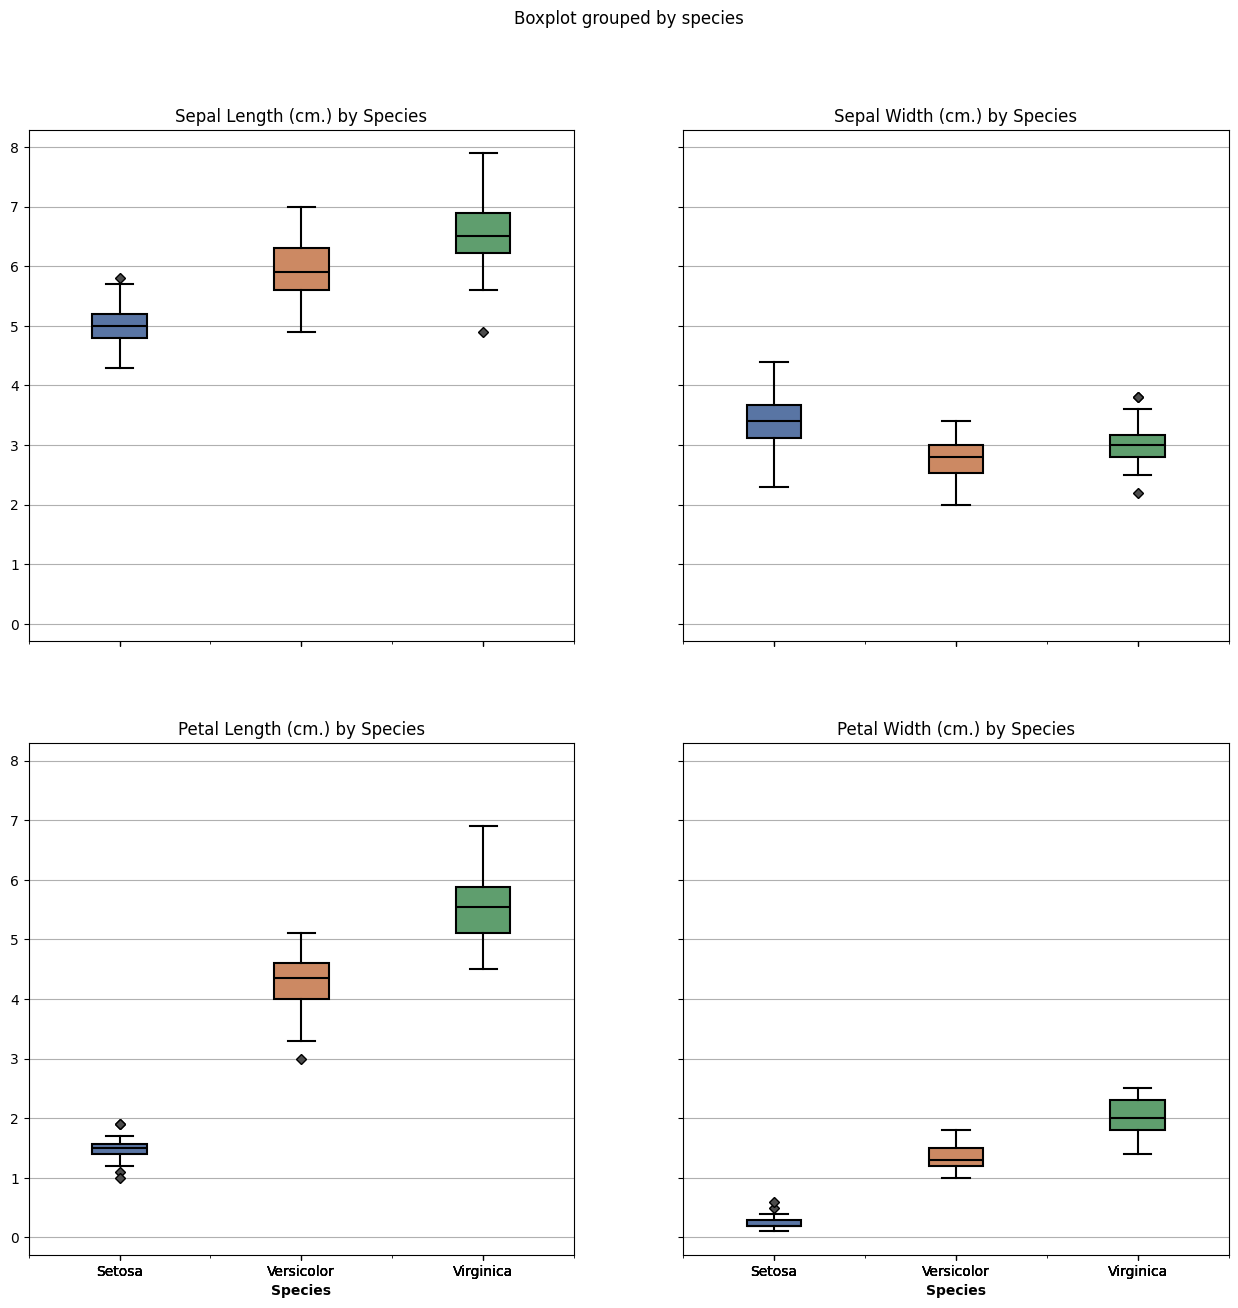

In [8]:

#sns.boxplot(x="variable", y="value", data=pd.melt(iris_df))

bp_dict = iris_df.replace({b'Iris-setosa': 'Setosa',b'Iris-versicolor': 'Versicolor',b'Iris-virginica': 'Virginica'} #I am replacing the names of the flower species in the dataframe so the species names can be displayed nicely in the graphs
                         ).boxplot(column=['sepal_length','sepal_width','petal_length','petal_width'], #specifying the columns that I want to graph/visualise
                                   by='species', #grouping the boxplot charts by species
                                   patch_artist = True, #enabling colors in the boxplots
                                   figsize=(15, 15), #creating the size of each chart
                                   flierprops={'marker': 'D', 'markersize': 5, 'markerfacecolor': '#4c4c4c'}, #defining and creating the markers for outliers
                                   return_type='both', #this returns a tuple of each boxplot chart (it allows me to view and edit each individual graph which I do later)
                                   medianprops = dict(color = "black", linewidth = 1.5), #I am making the median line black
                                   whiskerprops = dict(color = "black", linewidth = 1.5), #I am making the whisker lines black
                                   capprops = dict(color = "black", linewidth = 1.5), #I am making the whisker cap (line at the end of the whisker) to be black
                                   boxprops = dict(linestyle='-', linewidth=1.5, color='black') #I am coloring the boxplot rectangular outline to be black
                                  )

colors = ['#5975a4', '#cc8963', '#5f9e6e'] #I am creating the colors that I will use to fill in the box-plots

# I am creating a for loop to edit each boxplot graph (editing things such as the title, x-axis labels, etc.) I can do this since I made my graphs into a `bp_dict` variable
for row_key, (ax,row) in bp_dict.items():

    #I am using this code chunk to create the titles of each plot. (I am just making sure to remove the underscore in the title)
    if row_key == 'sepal_length':
        row_key = 'Sepal Length'
    elif row_key == 'sepal_width':
        row_key = 'Sepal Width'
    elif row_key == 'petal_length':
        row_key = 'Petal Length'
    elif row_key == 'petal_width':
        row_key = 'Petal Width'
        
    ax.set_title(row_key + ' (cm.) by Species') #defining the title of each graph
    ax.grid(axis = "x") #I am making the grid background of each graph to only include horizontal lines
    ax.set_xlabel('Species',fontweight ='bold') #I am making a sub x-axis label that lets the viewer know that all flower names are species
    
    for i,box in enumerate(row['boxes']): #using this for loop to iterate over each individual box plot in each graph
        box.set_facecolor(colors[i]) #I am filling in specific colors for each individual boxplot

plt.show()


#### Method two of graphing (creating each graph individualy)

Here is my second method of graphing the boxplots for each column. I like this second method because I was able to graph the volume column by using a `for()` loop. The `for()` loop allows me to present each graph individualy as opposed to a cluster as shown in method one. 

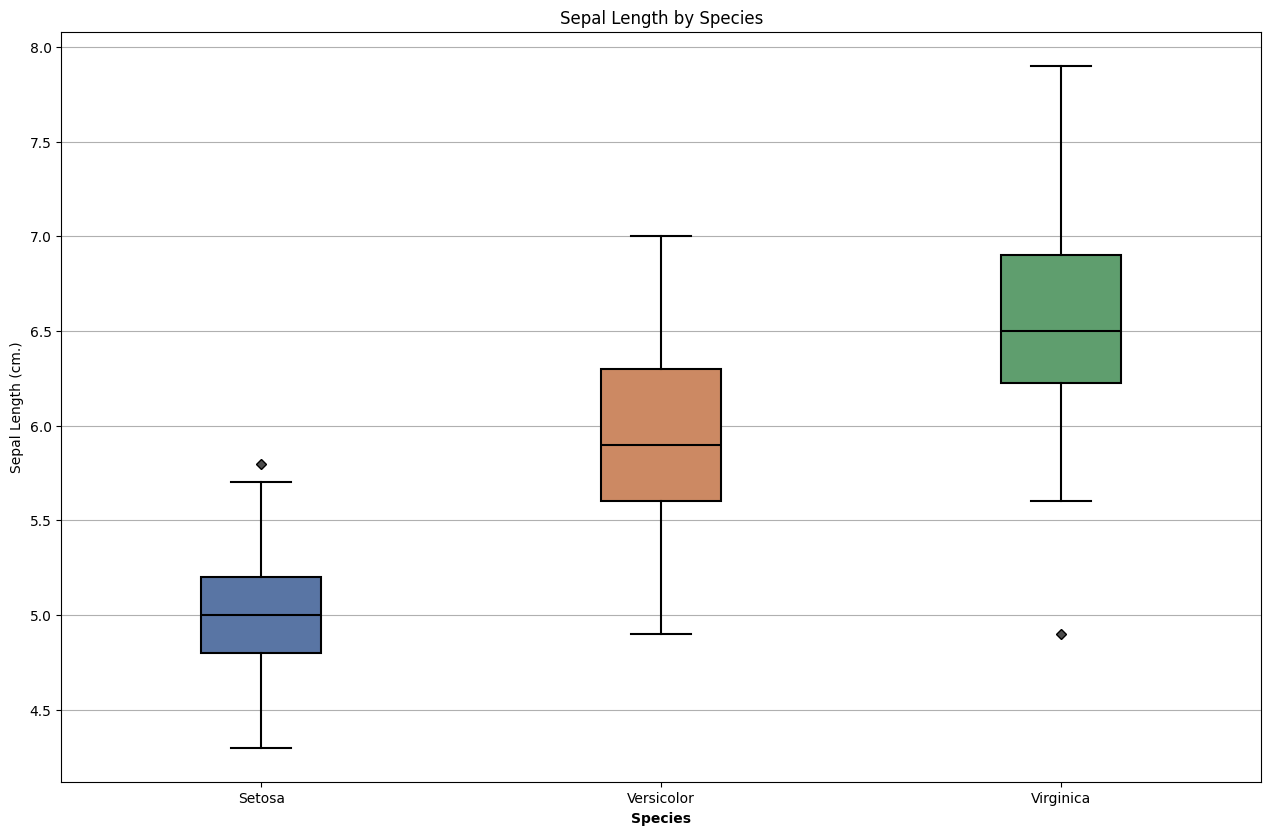

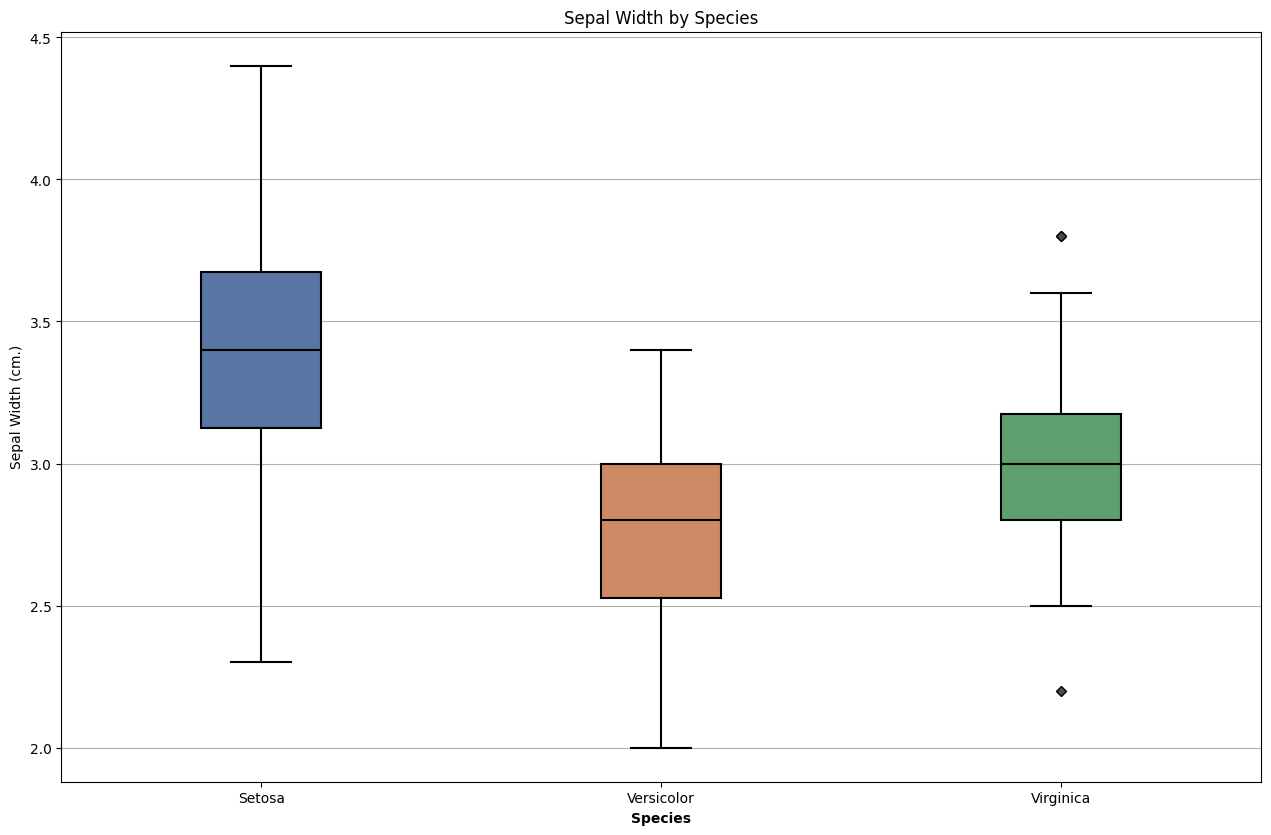

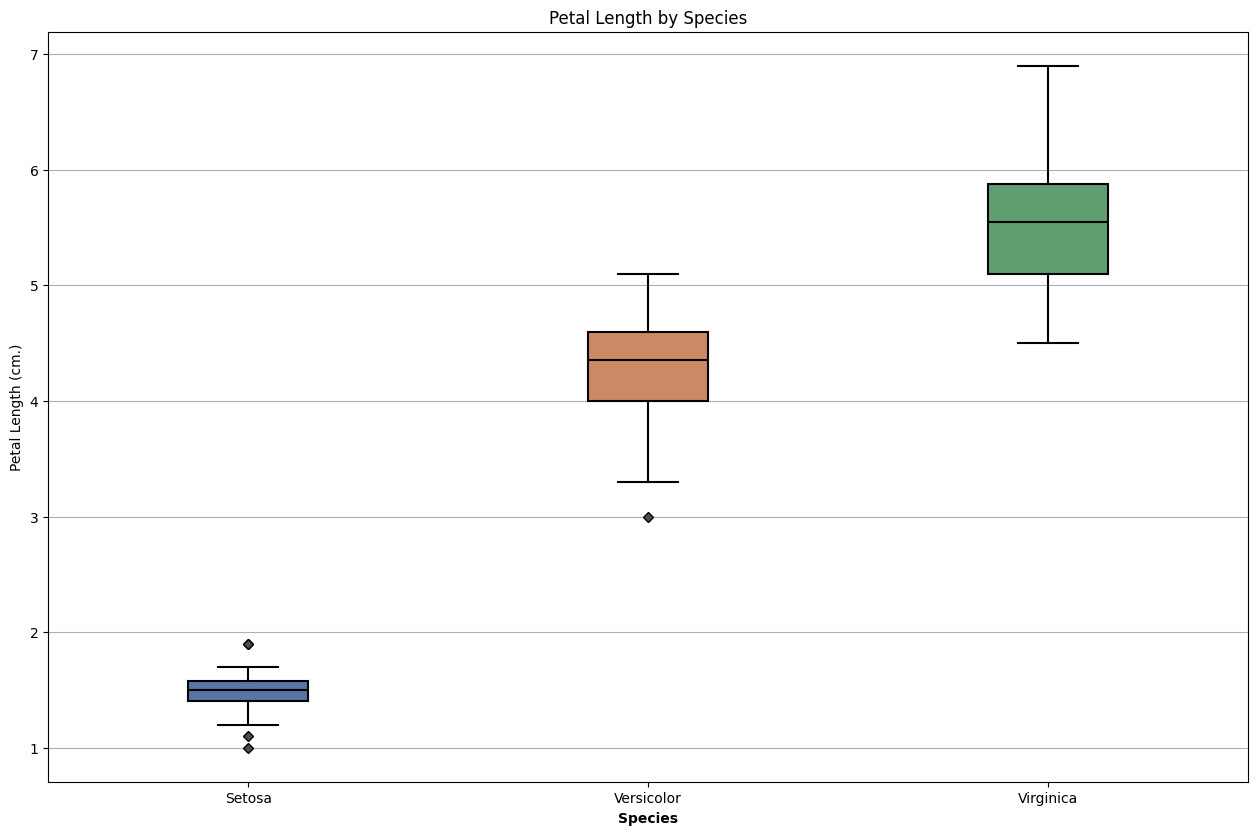

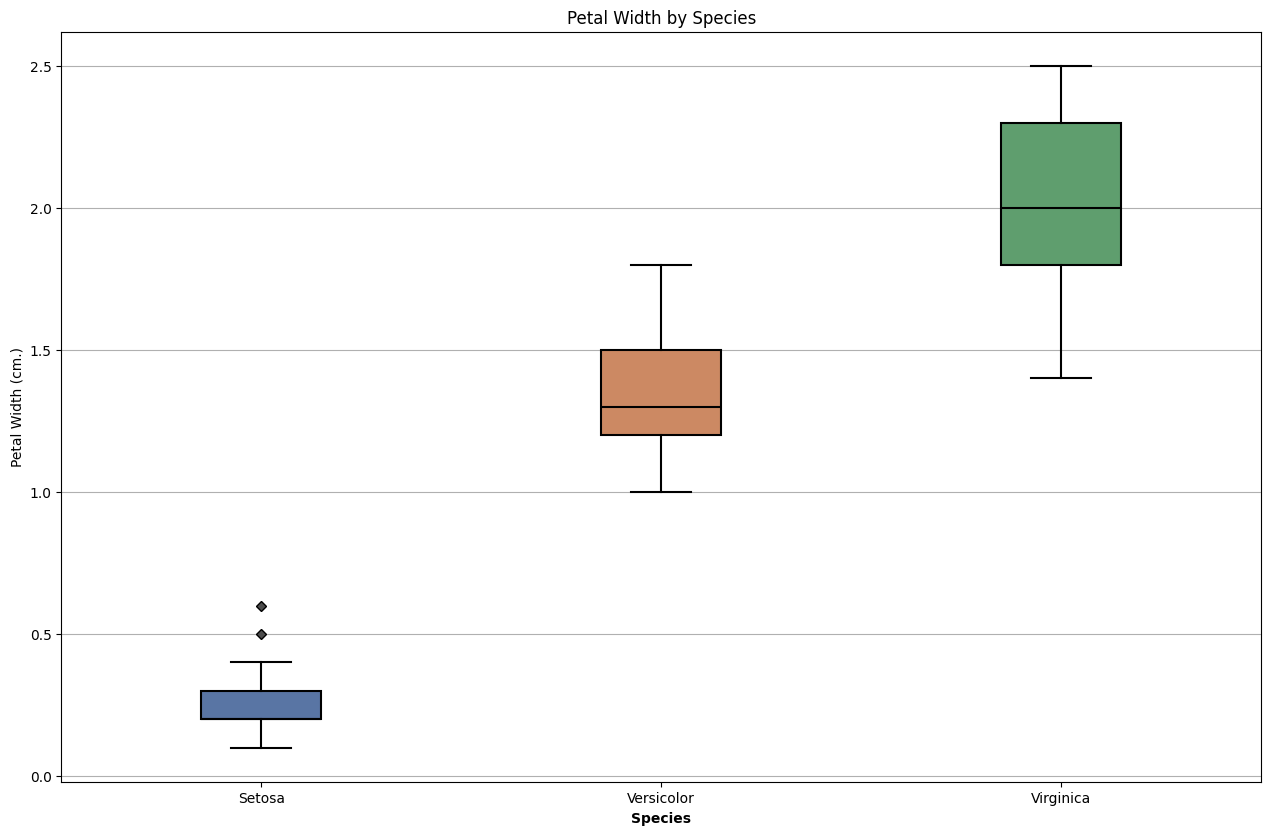

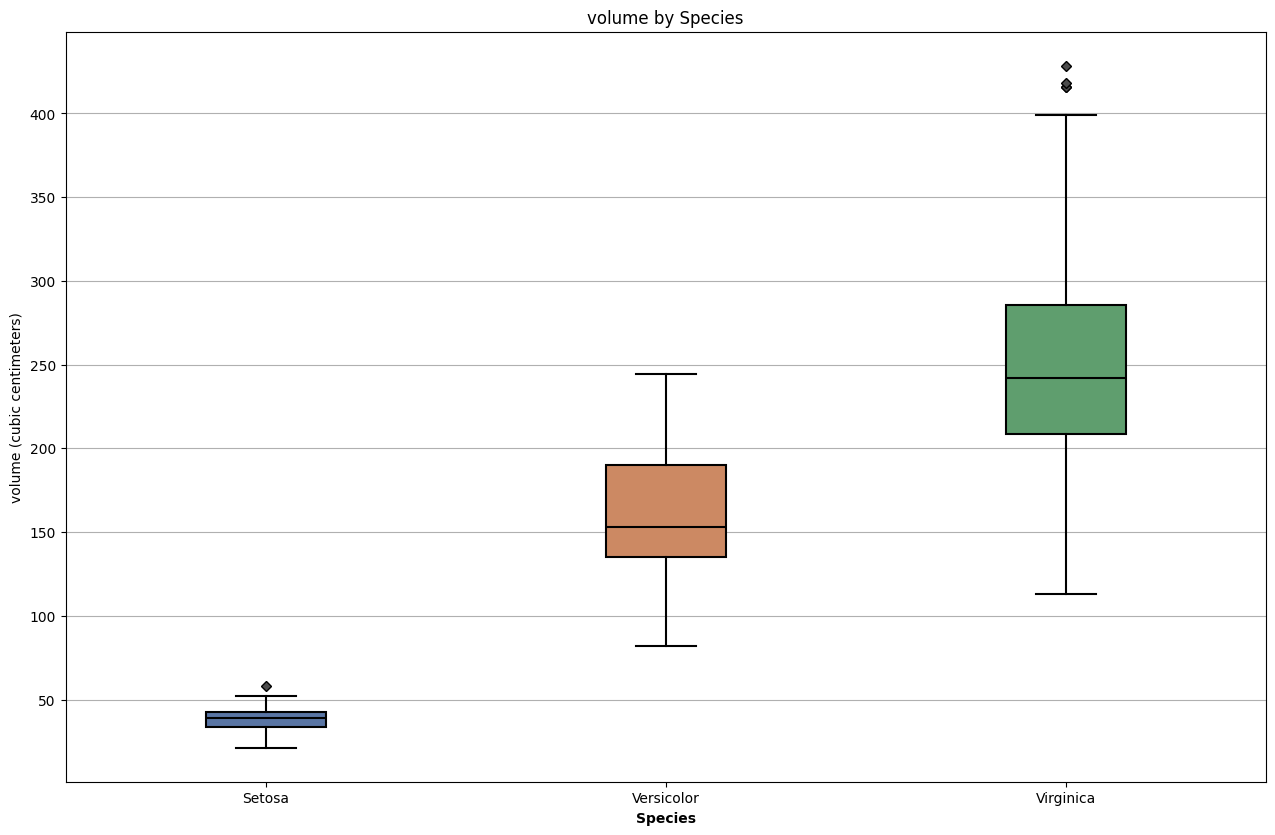

In [9]:
for x in list(iris_df.columns): #I am creating a for loop to go over the list of each column in `iris_df` because this method allows me to create each graph individually instead of as a group

    if x != 'species':
        bp_dict = iris_df.replace({b'Iris-setosa': 'Setosa',b'Iris-versicolor': 'Versicolor',b'Iris-virginica': 'Virginica'} #I am replacing the names of the flower species in the dataframe so the species names can be displayed nicely in the graphs
                                 ).boxplot(column=x, #specifying the columns that I want to graph/visualise. I do not need to specify a list since I already go through each column in the for loop
                                           by='species', #grouping the boxplot charts by species
                                           patch_artist = True, #enabling colors in the boxplots
                                           figsize=(15, 10), #creating the size of each chart
                                           flierprops={'marker': 'D', 'markersize': 5, 'markerfacecolor': '#4c4c4c'}, #defining and creating the markers for outliers
                                           return_type='both', #this returns a tuple of each boxplot chart (it allows me to view and edit each individual graph which I do later)
                                           medianprops = dict(color = "black", linewidth = 1.5), #I am making the median line black
                                           whiskerprops = dict(color = "black", linewidth = 1.5), #I am making the whisker lines black
                                           capprops = dict(color = "black", linewidth = 1.5), #I am making the whisker cap (line at the end of the whisker) to be black
                                           boxprops = dict(linestyle='-', linewidth=1.5, color='black') #I am coloring the boxplot rectangular outline to be black
                                          )
        #creating individual chart titles
        if x == 'sepal_length':
            x = 'Sepal Length'
        elif x == 'sepal_width':
            x = 'Sepal Width'
        elif x == 'petal_length':
            x = 'Petal Length'
        elif x == 'petal_width':
            x = 'Petal Width'
        plt.ylabel(x + ' (cm.)') # I am creating the y-axis label

        if x == 'volume':
            plt.ylabel(x + ' (cubic centimeters)') # I am creating the y-axis label which specifies the units for volume

        plt.grid(axis = "x") #I am making the grid background of each graph to only include horizontal lines 
        plt.suptitle('') #removing the title created by the group_by command (which was "boxplot grouped by species")
        plt.title(x + ' by Species') #setting the title for each graph

        colors = ['#5975a4', '#cc8963', '#5f9e6e'] #creating the individual colors for each boxplot in each graph/chart
        for row_key, (ax,row) in bp_dict.items(): #I am going through the boxplot items in the `bp_dict` variable to fill in the color of each boxplot
            ax.set_xlabel('Species',fontweight ='bold') #I am making a sub x-axis label that lets the viewer know that all flower names are species. `.ax` represents the axis label
            
            for i,box in enumerate(row['boxes']): #using this for loop to iterate over each individual box plot in each graph
                box.set_facecolor(colors[i]) #I am filling in specific colors for each individual boxplot

### 1D. Provide a short intrepretation of the data visualised by your 1C solution. (5 marks)


The **Virginica** flower species is the largest flower species when compared with **Versicolor** and **Setosa**. This is because **Virginica** has the biggest median **sepal length, petal length, petal width, and volume**. 

The **Setosa** flower does have the largest median **sepal width**, but it has the smallest median **sepal length, petal length, petal width, and volume** which shows that it is a small flower when compared to the virginica and versicolor flower. I would have said that perhaps the setosa flower could be as big as the virginica flower but its measurments were small in all the other variables (sepal length, petal length, petal width, and volume) which led to my conclusion that this is the smallest flower.

The **versicolor** flower is in the middle and is neither big or small when compared with Setosa and Virginica. When looking at the median **sepal length, petal length, petal width, and volume** of the **versicolor** flower you will notice that its median value is in the middle of the **Virginica** and **Setosa** flowers. 

I would also like to point out that the **sepal width** median measurements of all flowers were approximatly the same (the values were not drastically far apart) which tells us that **Setosa** having the biggest sepal width does not make it uniquely big. 

#### Sepal Length
*   I say this because if you look at the **sepal length boxplot** the difference between the median sepal length of the Virginica flower (6.5 cm) and the median Setosa (5 cm) is **2.5 cm.**

#### Petal Length
*   If you look at the **petal length boxplot** the difference between the median petal length of the Virginica flower (around 5.5 cm) and Setosa (around 1.5 cm) is **4 cm.**

#### Petal Width
*   In the **petal width boxplot** the difference between the median petal width of the Virginica flower (2 cm) and Setosa (around 0.25 cm) is **1.75 cm.**

#### Volume
*   In the **volume boxplot** the difference between the median volume of the Virginica flower (around 250 cubic centimeters) and Setosa (around 50 cubic centimeters) is **200 cubic centimeters**

# Part 2 - Personal Project (out of 50 marks)
In this second part of Assignment 2 you have the opportunity to perform some data analysis on a dataset of your choice. Choose a dataset or a scenario that interests you and provide an outline of the scenario, clean the dataset (if needed), perform some statistic analysis, visualise this data analysis and comment on what you see.   

## [Provide a brief introduction to your dataset here] (5 marks)

It would be good to briefly introduce your dataset here. You could also illustrate an overview of the column information, and a sample of rows from the database using some methods that we have looked at. 

#### Introduction to dataset

For this assignment, I will be analysing New York City (nyc) flight data which I have imported from the `flights` library in the `nycflights13` python data package. Before I start to answer my questions and analyse the data further I have displayed the first five rows of the dataset and have created a summary statistic table to get a better understanding of the data. 

*   **My first observation**: When viewing the dataset and creating the summary statistic table I noticed that the summary statistic gave me a good overview of the dataset. For example, from the `year` column I could see that the mean was **2013** so that let me know that this dataset contains flight data from around 2013 (this turned out to be true when looking at the minimum and maximum which were both 2013)

In [10]:
#installed the `nycflights13` python data package for nyc flight data
#pip install nycflights13
#pip install plotly

In [11]:
# Add setup code here - set the path to the chosen dataset, and import the relevant Python libraries.
from nycflights13 import flights #impoting the flights library which contains all the nyc flight data
#the other python libraries (ex. pandas, numpy) were imported in part 1 of this assignment

In [12]:
pd.DataFrame(flights)[0:5] #viewing the data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.00,545,-1.00,"1,004.00",1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01T11:00:00Z


In [13]:
# Load in your data and display some descriptive statistics and commentary to provide a summary of the dataset.
pd.DataFrame(flights).describe() #summary statistics of the data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,"336,776.00","336,776.00","336,776.00","328,521.00","336,776.00","328,521.00","328,063.00","336,776.00","327,346.00","336,776.00","327,346.00","336,776.00","336,776.00","336,776.00"
mean,"2,013.00",6.55,15.71,"1,349.11","1,344.25",12.64,"1,502.05","1,536.38",6.90,"1,971.92",150.69,"1,039.91",13.18,26.23
std,0.00,3.41,8.77,488.28,467.34,40.21,533.26,497.46,44.63,"1,632.47",93.69,733.23,4.66,19.30
min,"2,013.00",1.00,1.00,1.00,106.00,-43.00,1.00,1.00,-86.00,1.00,20.00,17.00,1.00,0.00
25%,"2,013.00",4.00,8.00,907.00,906.00,-5.00,"1,104.00","1,124.00",-17.00,553.00,82.00,502.00,9.00,8.00
50%,"2,013.00",7.00,16.00,"1,401.00","1,359.00",-2.00,"1,535.00","1,556.00",-5.00,"1,496.00",129.00,872.00,13.00,29.00
75%,"2,013.00",10.00,23.00,"1,744.00","1,729.00",11.00,"1,940.00","1,945.00",14.00,"3,465.00",192.00,"1,389.00",17.00,44.00
max,"2,013.00",12.00,31.00,"2,400.00","2,359.00","1,301.00","2,400.00","2,359.00","1,272.00","8,500.00",695.00,"4,983.00",23.00,59.00


## 1. [Choose and write a question here] (15 marks)
### (e.g. What percentage of male and female passengers perished?)


# Question 1) Is there a relationship between the average delay and flights that are cancelled (on that day)?

To answer this question I needed to note down which flights got cancelled. I do this by creating a new column `cancelled` and check if there are `NA` values in the `dep_delay` **and** `arr_delay` columns. If there is then I mark the row with a one which means that the specific flight was delayed. (**Note:** I determine that the flights is cancelled because if was on time then the `dep_delay` or `arr_delay` columns would have a zero value. 

After I do this I would need to group all my variables by day and would then need to calculate the means of the departure delays and proportion of flights cancelled. I would then graph these variables to see if there is a relationship between the average delay and flights cancelled.

In [14]:
flights['cancelled'] = ((flights['dep_delay'].isna()) & (flights['arr_delay'].isna())).astype(int)
flights_summary = flights.groupby(['year', 'month', 'day']).agg( # I am using the aggregate function to calculate the means and proportions of the grouping that I have made
    avg_delay1 = ('dep_delay','mean'), #I am calculating the mean of the `dep_delay` column
    flights_proportion = ('cancelled', lambda x: 100 * x.mean()) #the `lambda()` function automatically gets the values in the `cancelled` column and assigned the values to x where the mean and proportion gets calculated
)
flights_summary = pd.DataFrame(flights_summary)
flights_summary[0:5]

avg_delay1  flights_proportion
year month day                                
2013 1     1         11.55                0.48
           2         13.86                0.85
           3         10.99                1.09
           4          8.95                0.66
           5          5.73                0.42

#### Conclusion and Answer

After looking at the grapg I have concluded that flights that have longer delay times have a higher proportion/percentage to be cancelled. This pattern can be seen in the second graph which shows that as a flights average delay time increases, then the proportion/percentage of the flight being cancelled increases.

*   **Note:** I filtered the flights proportion in the second graph because I noticed that there were too many outliers in the first graph which prevented me from analysing the data correctly.

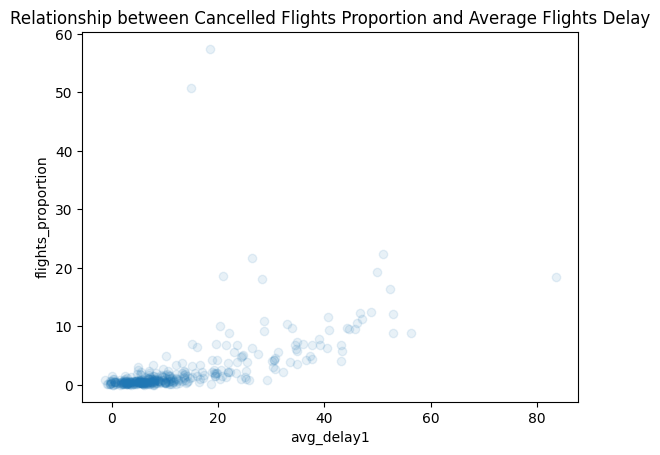

In [21]:
#graphing the average deplay and flight cancelled proportions (without filtering the flights proportion)
plt.scatter(flights_summary['avg_delay1'], flights_summary['flights_proportion'], alpha=0.1)
plt.xlabel('avg_delay1')
plt.ylabel('flights_proportion')
plt.title('Relationship between Cancelled Flights Proportion and Average Flights Delay' )
plt.show()

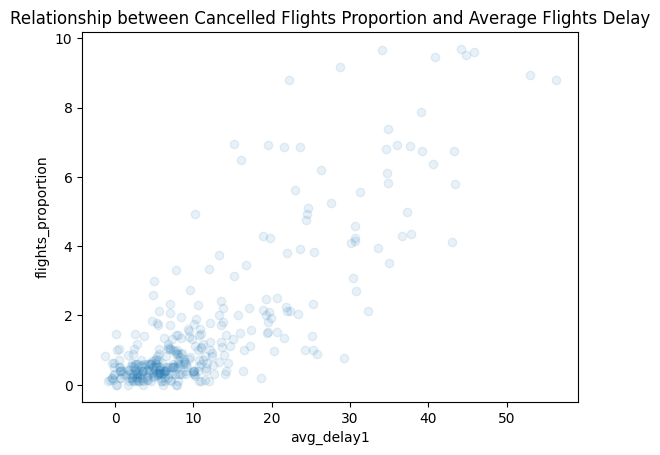

In [22]:
#graphing the average deplay and flight cancelled proportions (filtering the flights proportion)
plt.scatter(flights_summary[flights_summary['flights_proportion'] < 10]['avg_delay1']
            , flights_summary[flights_summary['flights_proportion'] < 10]['flights_proportion'], alpha=0.1)
plt.xlabel('avg_delay1')
plt.ylabel('flights_proportion')
plt.title('Relationship between Cancelled Flights Proportion and Average Flights Delay')
plt.show()

## 2. What hour of the day will have the least delays? (15 marks)

#### Answer 
As you can see from the graph below around 5-8 AM is the best time to book a flight since there is a high chance that the flights going around those times will depart early or on time. 

In [17]:
# I am creating a `not_cancelled` variable to drop the rows that included flights that were cancelled (potentially cancelled)
not_cancelled = flights.dropna(subset=['dep_delay', 'arr_delay']) # filtering delayed flights because we want to see non-cancelled flights

not_cancelled[not_cancelled['dep_delay'] <= 0][0:5] #I want to filter out the rows that had a negative departure delay since that means that those flights were early or on time

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,cancelled
3,2013,1,1,544.00,545,-1.00,"1,004.00",1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01T10:00:00Z,0
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01T11:00:00Z,0
5,2013,1,1,554.00,558,-4.00,740.00,728,12.00,UA,1696,N39463,EWR,ORD,150.00,719,5,58,2013-01-01T10:00:00Z,0
6,2013,1,1,555.00,600,-5.00,913.00,854,19.00,B6,507,N516JB,EWR,FLL,158.00,1065,6,0,2013-01-01T11:00:00Z,0
7,2013,1,1,557.00,600,-3.00,709.00,723,-14.00,EV,5708,N829AS,LGA,IAD,53.00,229,6,0,2013-01-01T11:00:00Z,0


[Text(0.5, 1.0, 'Proportion of on time flights by each hours')]

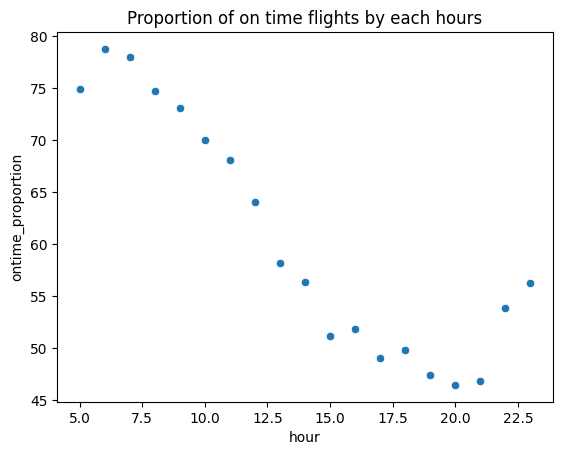

In [42]:
not_cancelled.loc[:,'flight_early'] = (not_cancelled['dep_delay'] <= 0).astype(int) #I am labelling the early flights with a one in the new 'flight_early' column that I am creating. This way I can calculate and graph the proportions of the early flights

not_cancelled_hourly = not_cancelled.groupby('hour').agg( #I am now grouping the not cancelled flights by hour and am aggrgating the proportions of early flights and calcuating their means
    ontime_proportion = ('flight_early', lambda x: 100 * x.mean())
)

sns.scatterplot(data=not_cancelled_hourly, x='hour', y='ontime_proportion').set(title= ('Proportion of on time flights by each hours'))

## 3. Which Carriers will most likley have a departure delay of 30 min.? (15 marks)

ExpressJet (EV) is the airline that will most likely have a departure delay for 30 minutes or more with a proportion of roughly 26%. Mesa Airlines (YV) comes in second with a proportion of roughly 23%. I reached this conclusion from the scatterplot below. I used the code below to reach this conclusion. I also displayed this data in a boxplot to display the data in another format visualization. 

#### Data as Scatterplot

[Text(0.5, 1.0, 'Proportion of on 30 min. delayed flights by airline carrier')]

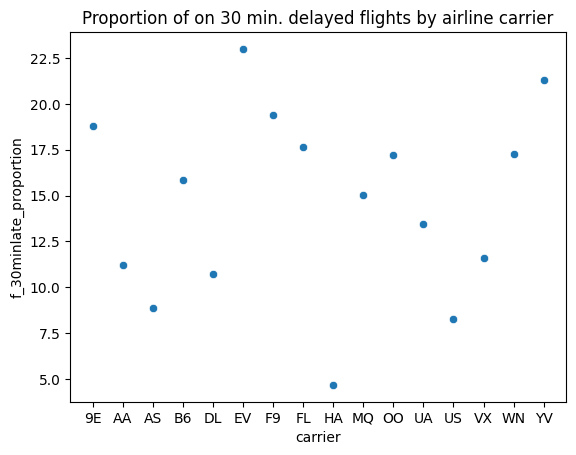

In [43]:
not_cancelled.loc[:,'flight_30minlate'] = (not_cancelled['dep_delay'] >= 30).astype(int) #creating a proportion columns of 1s and 0s that indicate flights that are 30 min. late
not_cancelled_carrier = not_cancelled.groupby('carrier').agg( #grouping the dataframe by carrier
    f_30minlate_proportion = ('flight_30minlate', lambda x: 100 * x.mean()) #calculating the proportions of 30 min. or more late flights
)
sns.scatterplot(data=not_cancelled_carrier, x='carrier', y='f_30minlate_proportion').set(title= ('Proportion of on 30 min. delayed flights by airline carrier'))


#### Data as Boxplot

[Text(0.5, 1.0, 'Proportion of on 30 min. delayed flights by airline carrier')]

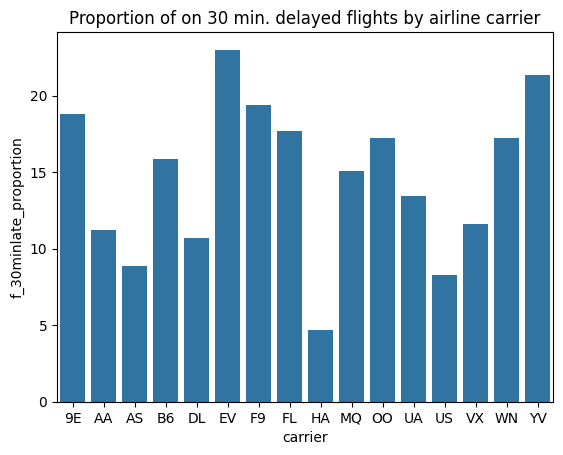

In [24]:
sns.barplot(data=not_cancelled_carrier, x='carrier', y='f_30minlate_proportion').set(title= ('Proportion of on 30 min. delayed flights by airline carrier'))